w[0]: 0.393906  b: -0.031804


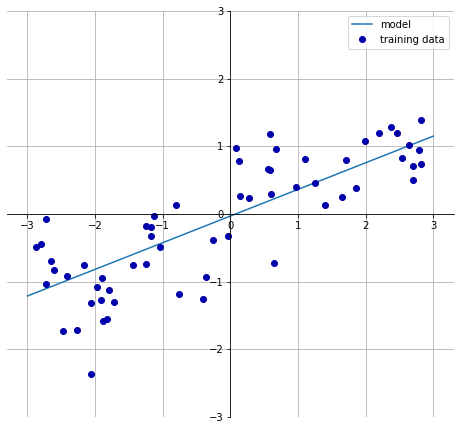

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

In [2]:
X, y = mglearn.datasets.load_extended_boston()

In [3]:
X.shape

(506, 104)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [5]:
lr = LinearRegression().fit(X_train, y_train)

In [6]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

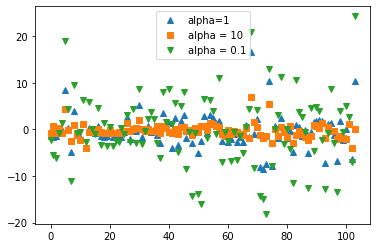

In [7]:
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, '^', label = "alpha=1")
plt.plot(ridge10.coef_, 's', label = "alpha = 10")
plt.plot(ridge01.coef_, 'v', label = "alpha = 0.1")
# plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.legend()
plt.show()

In [8]:
ridge.coef_.shape

(104,)

In [9]:
X_train.shape

(379, 104)

In [10]:
X.shape    # boston 데이터의 크기는 506.

(506, 104)

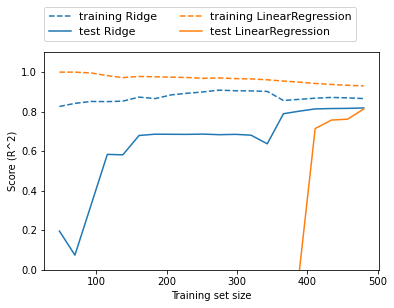

In [11]:
mglearn.plots.plot_ridge_n_samples()
# ridge 그래프는 규제가 있을 때, linearregression 그래프는 규제가 없을 때.
# 데이터 셋 400 미만에서 규제가 없는 LinearRegression 선형 회귀는 학습이 안 되고 있음.
# 데이터 양을 충분히 주면 규제가 없어도 성능이 만들어 진다.
# 데이터가 많을수록 과대적합이 줄어든다.(training LinearRegression그래프를 보면, 훈련 데이터에 대한 성능은 감소하고 있음을 알 수 있음.)

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [13]:
lasso.score(X_train, y_train)

0.29323768991114607

In [14]:
lasso.score(X_test, y_test)

0.20937503255272294

In [15]:
# 사용한 특성의 개수 => 104개의 y값 중에서 100개나 날려먹은거임!
import numpy as np
np.sum(lasso.coef_ != 0)

4

In [16]:
lasso001 = Lasso(alpha = 0.01, max_iter = 50000).fit(X_train, y_train)  # max_iter을 늘려야 lasso가 버리는 값이 줄어듦.

In [17]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 50000).fit(X_train, y_train)

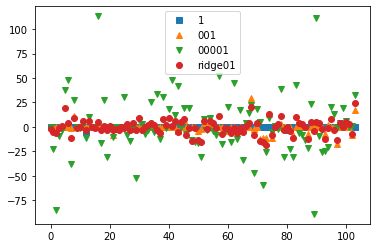

In [18]:
plt.plot(lasso.coef_, 's', label = "1")
plt.plot(lasso001.coef_, '^', label = "001")
plt.plot(lasso00001.coef_, 'v', label = "00001")
plt.plot(ridge01.coef_, 'o', label = "ridge01")
plt.legend()
plt.show()

In [19]:
np.sum(lasso001.coef_ != 0)

33

In [20]:
np.sum(lasso00001.coef_ != 0)    # 공부는 거의 다 했는데, 그러다 보니 선형회귀랑 비슷하게 과대적합이 일어남.

96

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [1]:
X, y = mglearn.datasets.make_forge()

NameError: name 'mglearn' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


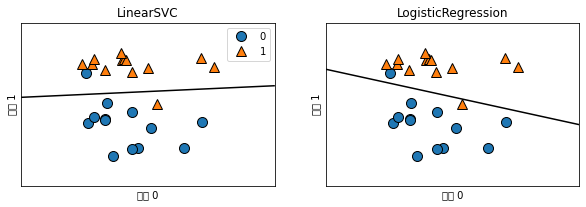

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3))
for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X,  ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

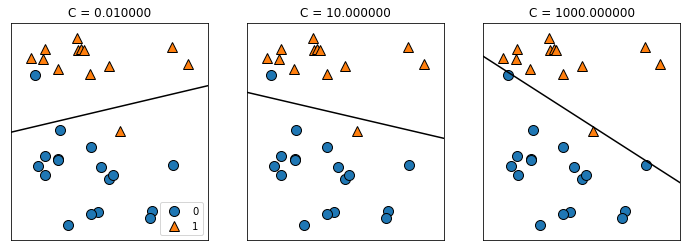

In [24]:
mglearn.plots.plot_linear_svc_regularization()

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
# stratify = cancer.target 이거는 target 기준으로 적절하게 잘 섞이게 훈련/검증 셋 나눠달라는 것.

In [26]:
logreg = LogisticRegression(C = 1, max_iter = 5000).fit(X_train, y_train)
logreg100 =LogisticRegression(C = 100, max_iter = 5000).fit(X_train, y_train)
logreg001 =LogisticRegression(C = 0.01, max_iter = 5000).fit(X_train, y_train)

In [27]:
logreg001.coef_.shape

(1, 30)

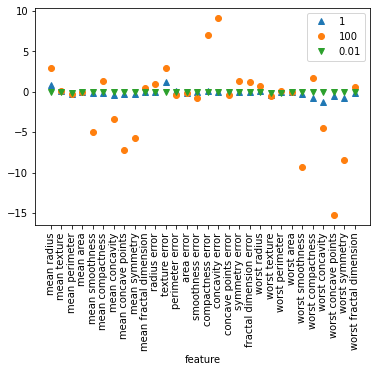

In [28]:
plt.plot(logreg.coef_.T, '^', label = "1")
plt.plot(logreg100.coef_.T, 'o', label = "100")
plt.plot(logreg001.coef_.T, 'v', label = "0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.xlabel("feature")
plt.legend()
plt.show()

In [32]:
!pip install graphviz
# pip으로 설치 먼저 하고, 구글링해서 graphviz 윈도우즈 64bit 버전으로 다운받아 설치하기.

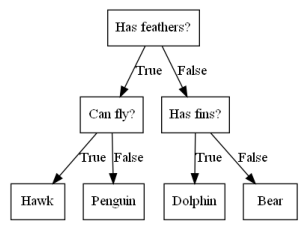

In [33]:
mglearn.plots.plot_animal_tree()

In [29]:
from sklearn.tree import DecisionTreeClassifier